<br>
<img src="data/logoMoSEF.jpeg" width=90px align="left">
<div align="right">Enseignant : Hager Oueslati</div>
<div align="right">Réalisé par : Gaoussou DIAKITE et Eunice KOFFI</div>
<div align="right">Année : 2022/2023</div><br><br><br>
<div align="center"><span style="font-family:Lucida Caligraphy;font-size:32px;color:darkgreen">Master 2 Modélistaion Statistiques Economiques et Financières</span></div><br>
<div align="center"><span style="font-family:Lucida Caligraphy;font-size:28px;color:#e60000">Projet Python avancé</span></div><br><br>
<hr>

<br>

<div align="center"><span style="font-family:Lucida Caligraphy;font-size:32px;color:darkgreen">Machine learning : Prédiction du prix des logements</span></div><br>
<hr/>

# Importation des modules

In [1]:
# suppression des warning 
import warnings
warnings.filterwarnings('ignore')

# Importation des librairie 
import pandas as pd
import numpy as np

# Data Visualisation
import missingno as msno
import matplotlib.pyplot as plt 
import seaborn as sns

#Modélisation 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.discrete.discrete_model

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor

from yellowbrick.regressor import PredictionError
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import CooksDistance

# Lecture et visualisation de la base de données

In [2]:
# Importation de la base des données
table = pd.read_csv('data/dataf.csv')

In [3]:
print(f'La base de données fait {table.shape[0]} lignes et {table.shape[1]} colonne')

La base de données fait 1030 lignes et 24 colonne


In [4]:
table.head(5)

,Unnamed: 0,Type,Dep,Code_dep,Code_postal,loyer,charges,Superficie,nb_piece,Garantie,...,Interphone,Gardien,Digicode,Terrain_extérieur,Terrasse,Balcon,stationnement,Chauffage,Description,Departement
0,0,Appartement,Toulouse,31,31000,650.0,30.0,22,1,1240.0,...,Oui,Oui,Oui,Non,Oui,Non,Non,Information indisponible,"Plein centre ville, en chartreuse au 1 er étag...",Haute-Garonne
1,1,Appartement,Reims,51,51100,450.0,40.0,27,1,820.0,...,Oui,Oui,Oui,Non,Oui,Non,Non,Information indisponible,hyper centre - place d'Erlon Un appartement me...,Marne
2,2,Appartement,Valenciennes,59,59300,409.0,25.0,18,1,768.0,...,Oui,Oui,Oui,Non,Oui,Non,Non,Information indisponible,Pas de descriptif,Nord
3,3,Appartement étudiant,Avignon,84,84000,490.0,48.0,25,1,884.0,...,Oui,Oui,Oui,Non,Oui,Oui,Non,Information indisponible,AVIGNON AGROPARC - Idéal pour étudiant ou jeun...,Vaucluse
4,4,Appartement,Pessac,33,33600,632.0,40.0,21,1,1077.0,...,Oui,Oui,Oui,Non,Oui,Non,Non,Information indisponible,"PESSAC - Au coeur du domaine universitaire, à ...",Gironde


In [5]:
table = table.drop('Unnamed: 0', axis=1)

In [6]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Type               1030 non-null   object 
 1   Dep                1030 non-null   object 
 2   Code_dep           1030 non-null   int64  
 3   Code_postal        1030 non-null   int64  
 4   loyer              1030 non-null   float64
 5   charges            1030 non-null   float64
 6   Superficie         1030 non-null   int64  
 7   nb_piece           1030 non-null   int64  
 8   Garantie           1030 non-null   float64
 9   Etage              1030 non-null   int64  
 10  Ascenseur          1030 non-null   object 
 11  WC_separe          1030 non-null   object 
 12  Cave               1030 non-null   object 
 13  Interphone         1030 non-null   object 
 14  Gardien            1030 non-null   object 
 15  Digicode           1030 non-null   object 
 16  Terrain_extérieur  1030 

# Preprocessing

Dans cette étape de modélisation, il convient d'analyser nos variables explicatives et supprimer celles dont on aura pas besoin.
Il conviendra également de dichotomiser nos variables catégorielles afin d'avoir un modèle robuste.

## Analyse des valeurs manquantes

**Aucune valeur manquante**

## Analyse des variables continues

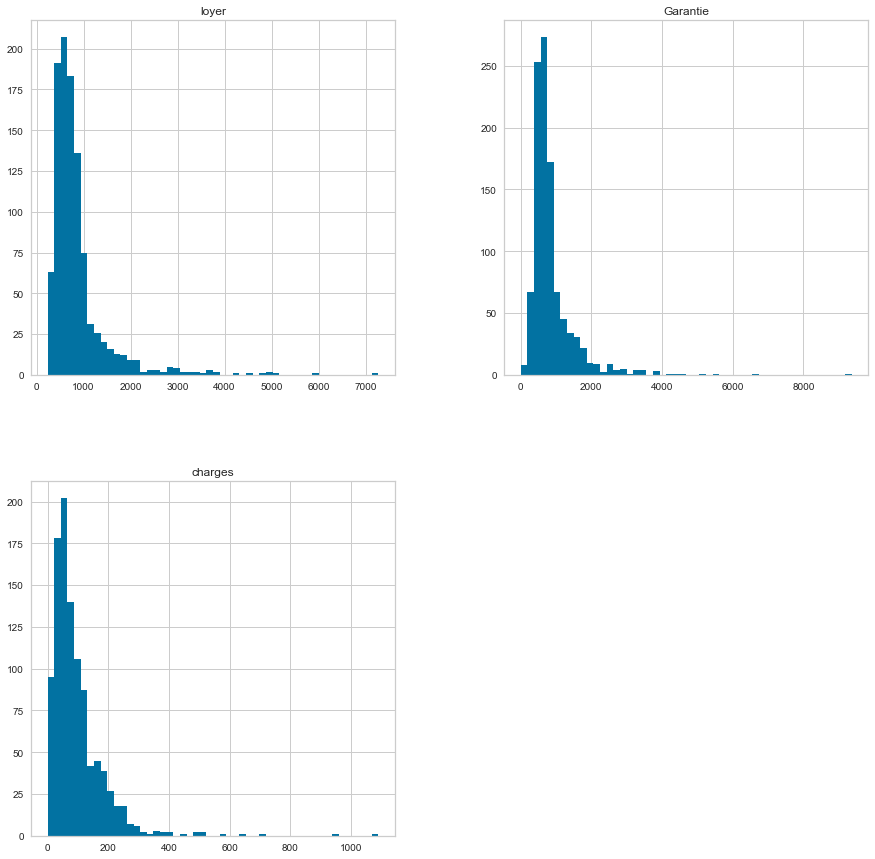

In [7]:
table[['loyer', 'Garantie', 'charges']].hist(bins=50, figsize=(15,15))
plt.show()

On remarque que ces variables sont toutes asymétriques. Ce qui nous paraît normal car il s'agit bien des types de logements différents. La charge d'une maison en location n'est pas comparable à la charge d'un appartement étudiant. Cependant, nous ne traiterons pas ces variables, car chacune des valeurs de ces variables a un sens.

## Analyse des variables catégorielles

In [8]:
col_cat= ['Type', 'Ascenseur', 'WC_separe', 'Cave', 'Interphone', 'Gardien', 'Digicode', 'Terrain_extérieur',
 'Terrasse', 'Balcon', 'stationnement', 'Chauffage', 'Code_postal', 'Code_dep', 'Description']

In [9]:
for col in col_cat : 
    print(col, table[col].nunique())

Type 4
Ascenseur 1
WC_separe 2
Cave 1
Interphone 2
Gardien 1
Digicode 1
Terrain_extérieur 2
Terrasse 2
Balcon 2
stationnement 3
Chauffage 4
Code_postal 360
Code_dep 59
Description 979


Nous constatons la présence de variables unimodales. Ces variables, n'apportant aucune information utile à notre modélisation, nous allons les supprimer. 
Nous allons également supprimer les variables **code postal, code_departement et description** car elles contiennent trop de modalités.

In [10]:
col_cat_drop = ["Ascenseur", "Cave", "Gardien", "Digicode", "stationnement", "Chauffage",'Dep', 'Code_dep', 'Code_postal', 'Description']

In [11]:
# on supprime les variables catégorielles séléctionnées
table = table.drop(col_cat_drop, axis=1)

## Analyse des corrélations

Analysons les corrélations entre les différentes variables. Pour éviter des biais de multicolinéarité lors de nos régressions, il est important de vérifier si elles sont corrélées entre elles. Nous allons donc afficher la matrice de corrélation.

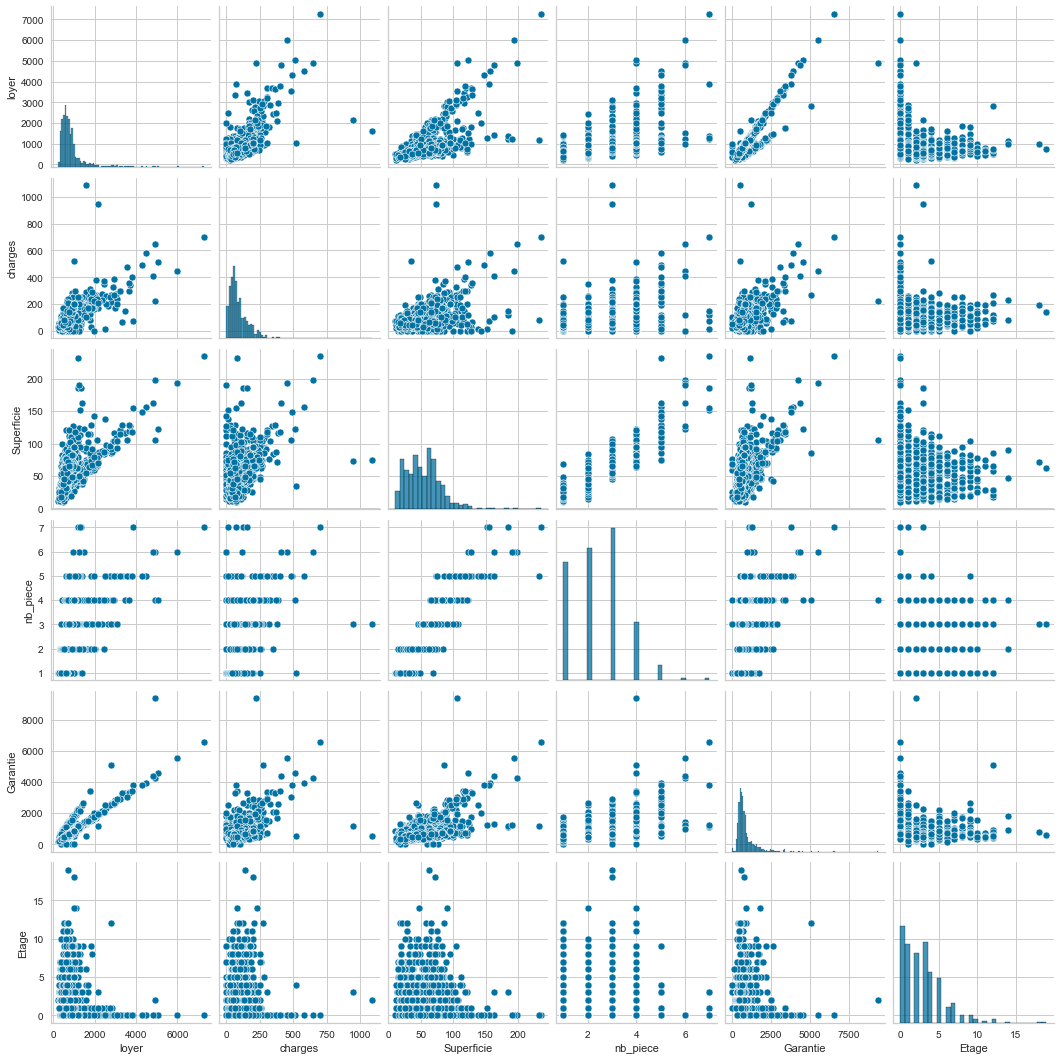

In [12]:
sns.pairplot(table)
plt.show()

Le graphique nous affiche plusieurs représentations de nos données dans un espace de deux dimensions en utilisant plusieurs combinaisons de nos variables. La forme du nuage de mots nous montre clairement si une corrélation linéaire existent entre les dimensions choisies. Nous pouvons de ce fait voir que certaines variables ne sont pas corrélées (étage et nombre de pièces).

La matrice de corrélation nous apportera une information chiffrée de nos remarques.

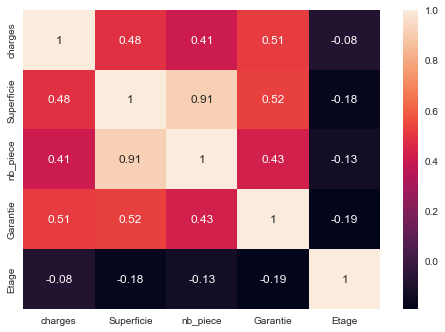

In [13]:
## On retire la target
X = table.drop(['loyer'], axis=1)
## Matrice de corrélation
corrMatrix = X.corr()
## visualisation avec heatmap
sns.heatmap(corrMatrix, annot=True)
plt.show()

Comme nous pouvons le voir dans la matrice de corrélation ci-dessus, il existe deux variables qui montrent une forte multicolinéarité **(r > 0,80)** : les chambres et la surface. Cela a du sens puisque plus une maison est grande, plus elle aura généralement de chambres.

Une façon de résoudre ce problème est de combiner les deux variables en une seule, par exemple en créant une nouvelle variable pour **la surface par chambre**.

Dans une conclusion quelque peu similaire à la surface, plus une maison a de chambres, plus le loyer devrait être élevé. Cependant, nous constatons qu'un autre facteur entre en ligne de compte car il existe des appartements de 5 pièces pour lesquels le loyer est plus faible que d'autres qui ont un plus petit nombre de pièces.

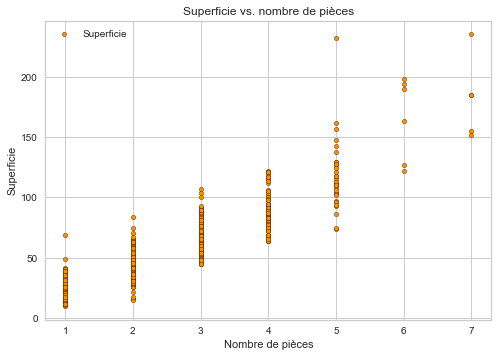

In [14]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(table['nb_piece'],table['Superficie'], s=20, edgecolor="black",c="darkorange", label="Superficie")
plt.xlabel("Nombre de pièces")
plt.ylabel("Superficie")
plt.title("Superficie vs. nombre de pièces")
plt.legend()
plt.show()

In [15]:
# Création de la nouvelle colonne espace carré par chambre 
table['surface_par_nb_piece'] = table['Superficie']/table['nb_piece']

# Supression des variables
table = table.drop(["nb_piece", "Superficie"], axis=1)

## Dichotomisation de nos variables catégorielles 

In [16]:
table_num = pd.get_dummies(table)

In [17]:
table_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 78 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   loyer                                 1030 non-null   float64
 1   charges                               1030 non-null   float64
 2   Garantie                              1030 non-null   float64
 3   Etage                                 1030 non-null   int64  
 4   surface_par_nb_piece                  1030 non-null   float64
 5   Type_Appartement                      1030 non-null   uint8  
 6   Type_Appartement en résidence sénior  1030 non-null   uint8  
 7   Type_Appartement étudiant             1030 non-null   uint8  
 8   Type_Maison                           1030 non-null   uint8  
 9   WC_separe_Non                         1030 non-null   uint8  
 10  WC_separe_Oui                         1030 non-null   uint8  
 11  Interphone_Non   

In [18]:
table_num

,loyer,charges,Garantie,Etage,surface_par_nb_piece,Type_Appartement,Type_Appartement en résidence sénior,Type_Appartement étudiant,Type_Maison,WC_separe_Non,...,Departement_Somme,Departement_Territoire de Belfort,Departement_Val-d'Oise,Departement_Val-de-Marne,Departement_Var,Departement_Vaucluse,Departement_Vendée,Departement_Vienne,Departement_Yonne,Departement_Yvelines
0,650.0,30.0,1240.0,1,22.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,450.0,40.0,820.0,1,27.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,409.0,25.0,768.0,3,18.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,490.0,48.0,884.0,2,25.00,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,632.0,40.0,1077.0,2,21.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,1027.0,198.0,828.0,5,23.75,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1026,990.0,198.0,792.0,5,23.75,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1027,787.0,140.0,647.0,5,22.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1028,1027.0,198.0,828.0,5,23.75,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
print(f'La base de données fait maintenant {table_num.shape[0]} lignes et {table_num.shape[1]} colonne')

La base de données fait maintenant 1030 lignes et 78 colonne


Maintenant qu'on a une base de données prête, on passe à l'étape de la modélisation

# Prédiction du prix des appartements

On a à présent, 77 variables dans notre jeu données. Mais toutes n'auront pas d'impact sur notre modèle. Raison pour laquelle on doit faire une préselection de nos variables explication avant l'entrainement du modèle.

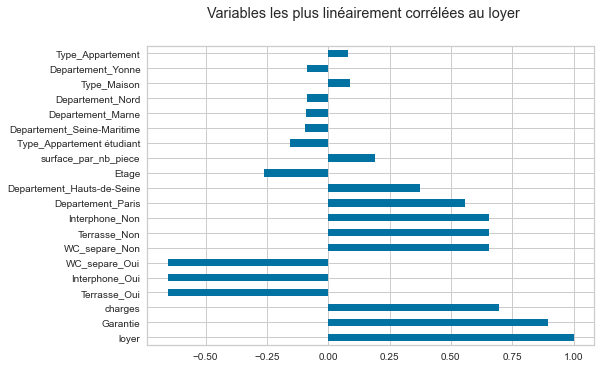

In [20]:
# Les 20 variables les plus corrélés linéairement au prix 
corr_matrix = table_num.corr()
var_corr = corr_matrix['loyer'].reindex(corr_matrix['loyer'].abs().sort_values(ascending = False).index)[0:20]
var_corr.plot(kind = 'barh')
plt.suptitle('Variables les plus linéairement corrélées au loyer')
plt.show()

Le graphique ci-dessus nous montre les  20 variables les plus corrélées linéairement à notre target qui est le prix du loyer.


* Charges et Garantie : on sait que plus la charge ou la garantie d'un logement est élévée, plus le loyer de cet appartement sera élévé. Mais dans notre cas ici, la charge est comprise dans le loyer et on sait aussi que la garantie n'est tout autre qu'une ou deux mensualités du loyer. Cependant ces deux variables doivent être supprimées pour ne pas biaiser l'analyse


* On peut également remarquer que : "le nombre de chambre" et "La superficie" sont hyper corrélées à notre cible. Ce qui n'est pas un résultat étonnant. Cependant, avoir une terrasse ou un wc separé impactera négativement le prix du loyer:  un résultat un peu choquant. Mais celui du wc_separé peut être dû  à l’hygiène qui est un argument utilisé pour défendre les toilettes dans la salle de bain. En effet, il est recommandé de placer les WC à proximité d’un lave-mains ou dans la même pièce.

* Eh OUI! Le departement Paris et hautes sur seine ont un fort impact sur le prix du logement, ce qui est également un résultat attendu.

In [21]:
table_num = table_num.drop(["Garantie", "charges"], axis=1)

## Modélisation 

In [22]:
# split les données 
# Features
X = table_num.drop("loyer", axis=1)

#Target
y = table_num.loyer

#train et test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [23]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  loyer   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     20.47
Date:                Sun, 29 Jan 2023   Prob (F-statistic):          1.30e-140
Time:                        19:42:57   Log-Likelihood:                -7692.0
No. Observations:                1030   AIC:                         1.552e+04
Df Residuals:                     963   BIC:                         1.585e+04
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


**Sélection de variables significatives**

In [24]:
col_save =['surface_par_nb_piece', 'Type_Appartement', 'Type_Appartement en résidence sénior', 'Type_Appartement étudiant',
           'Type_Maison', 'WC_separe_Non', 'WC_separe_Oui', 'Interphone_Non', 'Interphone_Oui', 'Terrain_extérieur_Non', 'Terrain_extérieur_OUI',
           'Terrasse_Non', 'Terrasse_Oui', 'Balcon_Non', 'Balcon_Oui', 'Departement_Paris', "Departement_Val-d'Oise", 'Departement_Hauts-de-Seine', "Departement_Isère",
          'Departement_Seine-Saint-Denis', "Departement_Val-d'Oise"]
X_ = X[col_save]

In [25]:
model = sm.OLS(y, X_)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  loyer   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     109.3
Date:                Sun, 29 Jan 2023   Prob (F-statistic):          1.69e-173
Time:                        19:42:57   Log-Likelihood:                -7716.8
No. Observations:                1030   AIC:                         1.546e+04
Df Residuals:                    1017   BIC:                         1.552e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


**Interprétation**

* R² = 0.56 

Notre modèle arrive à expliquer 56% de la variance du loyer. On a un bon ajustement de notre modèle aux variables

* Prob F-statistic = 1.69e-173

Au seuil de 5 %, on rejette l'hypothèse nulle selon laquelle notre modèle n'est pas globalement significatif.

* Prob(JB) = 0.00

Au seuil de 5 %, on rejette l'hypothèse nulle selon laquelle nos résidus ne suivent pas une loi normale.

* Les variables explicatives ne sont pas toutes significatives.

La surface par piece est significative : Si la surface par pièce augmente de 1m² le loyer augmentera de 9, 25 € toutes choses égales par ailleurs.
Le fait qu'un appartement soit un appartement étudiant dimuniera le loyer de 158, 45 € en moyenne par rapport aux autres toutes choses égales par ailleurs.
Le fait un logement se situe à Paris augmentera le loyer en moyenne de 1155 € toutes choses égales par ailleurs.


## Gadient Boosting Regressor

=====GradientBoostingRegressor=====
Score Test: 0.7348424597679719
MAE: 214.80073791810176
MSE: 126012.06688294394


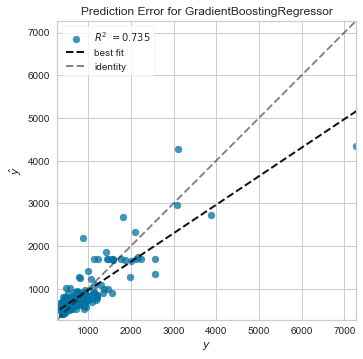

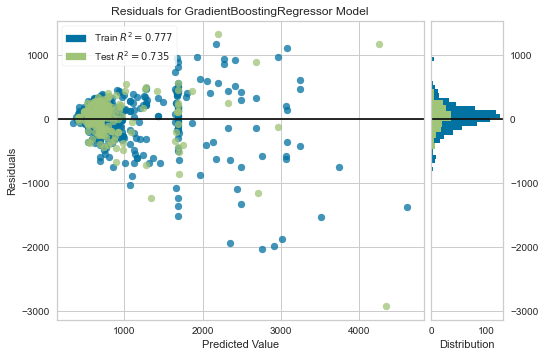

In [26]:
gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)
print("=====GradientBoostingRegressor=====")
print("Score Test:",gb.score(X_test,y_test))
pred_gb = gb.predict(X_test)
print("MAE:",mean_absolute_error(y_test,pred_gb))
print("MSE:",mean_squared_error(y_test,pred_gb))

visualizer = PredictionError(gb)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)
visualizer.show(); 

visualizer = ResidualsPlot(gb)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

**Interprétation des résultats**

Le modèle a de meilleures performances que la régression linéaire effectuée.

<ul>
    <li><a href="0. Sommaire et résumé.ipynb">Retourner au sommaire</a></li>
    <li><a href="https://eunicekoffi-projetpython-app-wuniri.streamlit.app/">Lien de l'application</a></li>
</ul>